In [22]:
%tensorflow_version 2.x

import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPool2D

In [3]:
train_datagenerator = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)

valid_datagenerator = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)

test_datagenerator = ImageDataGenerator(rescale=1./255)

In [5]:
dataset_dir = '/content/drive/MyDrive/Datasets/shark_notshark_dataset'

training_image_generator = train_datagenerator.flow_from_directory(
        dataset_dir + '/train',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

validation_image_generator = valid_datagenerator.flow_from_directory(
         dataset_dir + '/validate',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

testing_image_generator = test_datagenerator.flow_from_directory(
         dataset_dir + '/test',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 2120 images belonging to 2 classes.
Found 346 images belonging to 2 classes.
Found 637 images belonging to 2 classes.


In [6]:
print('Unique classes:', training_image_generator.class_indices)

Unique classes: {'not_shark': 0, 'shark': 1}


In [7]:
train_steps = training_image_generator.n // training_image_generator.batch_size
valid_steps = validation_image_generator.n // validation_image_generator.batch_size

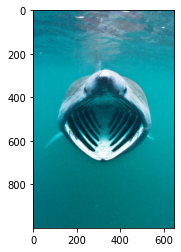

In [8]:
img1 = image.load_img('/content/drive/MyDrive/Datasets/shark_notshark_dataset/train/shark/basking_0.jpg')
plt.imshow(img1)

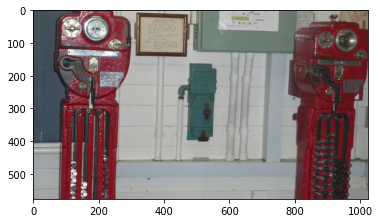

In [10]:
img2 = image.load_img('/content/drive/MyDrive/Datasets/shark_notshark_dataset/train/not_shark/0001ac0d0bcac46c.jpg')
plt.imshow(img2)

In [12]:
model = tf.keras.Sequential([
                             Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3), padding='same'),
                             Conv2D(32, (3, 3), activation='relu', padding='same'),
                             MaxPool2D(3,3),
                             Dropout(0.25),
                             Conv2D(64, (3, 3), activation='relu', padding='same'),
                             Conv2D(64, (3, 3), activation='relu', padding='same'),
                             MaxPool2D(3,3),
                             Dropout(0.25),
                             Flatten(),
                             Dense(256, activation='relu'),
                             Dropout(0.5),
                             Dense(1, activation='sigmoid')

])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 64)        0

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
results = model.fit(training_image_generator, 
                              steps_per_epoch=train_steps,
                              epochs=10,
                              validation_data=validation_image_generator,
                              validation_steps=valid_steps)

Epoch 1/10
54/66 [=======================>......] - ETA: 2:19 - loss: 0.3193 - accuracy: 0.8838

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


66/66 [==============================] - 888s 13s/step - loss: 0.2928 - accuracy: 0.8961 - val_loss: 0.1574 - val_accuracy: 0.9344
Epoch 2/10
66/66 [==============================] - 632s 10s/step - loss: 0.1408 - accuracy: 0.9464 - val_loss: 0.1095 - val_accuracy: 0.9594
Epoch 3/10
66/66 [==============================] - 636s 10s/step - loss: 0.1482 - accuracy: 0.9483 - val_loss: 0.1017 - val_accuracy: 0.9594
Epoch 4/10
66/66 [==============================] - 630s 10s/step - loss: 0.1222 - accuracy: 0.9550 - val_loss: 0.1059 - val_accuracy: 0.9531
Epoch 5/10
66/66 [==============================] - 628s 10s/step - loss: 0.1151 - accuracy: 0.9607 - val_loss: 0.1065 - val_accuracy: 0.9625
Epoch 6/10
66/66 [==============================] - 628s 10s/step - loss: 0.1183 - accuracy: 0.9574 - val_loss: 0.0947 - val_accuracy: 0.9594
Epoch 7/10
66/66 [==============================] - 629s 10s/step - loss: 0.0860 - accuracy: 0.9689 - val_loss: 0.0959 - val_accuracy: 0.9625
Epoch 8/10
66/66 

## Predictions

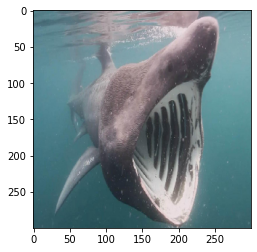

Shark


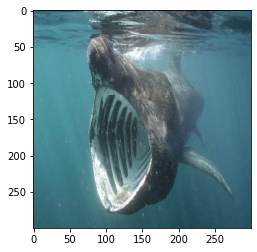

Shark


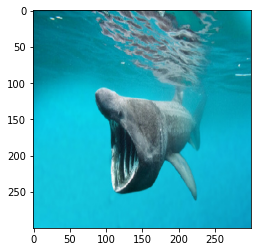

Shark


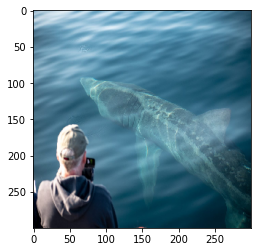

Shark


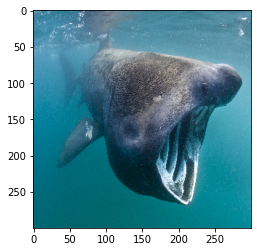

Shark


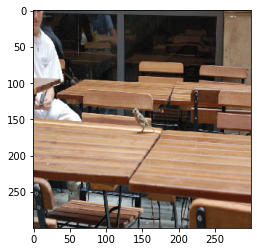

Not Shark


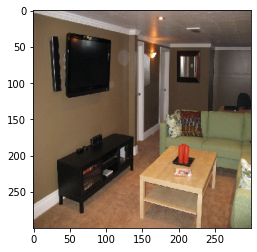

Not Shark


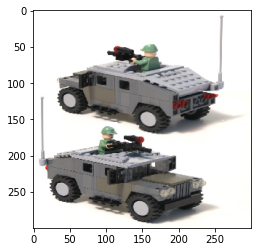

Not Shark


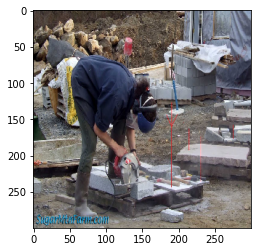

Not Shark


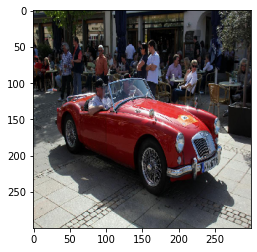

Not Shark


In [24]:
test_shark_dir = '/content/drive/MyDrive/Datasets/shark_notshark_dataset/test/shark'
test_notshark_dir = '/content/drive/MyDrive/Datasets/shark_notshark_dataset/test/not_shark'

for i in os.listdir(test_shark_dir)[:5]:
  img = image.load_img(test_shark_dir + '/' + i, target_size=(300,300))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])

  res = model.predict(images)
  if res == 0:
    print('Not Shark')
  else:
    print('Shark')

for i in os.listdir(test_notshark_dir)[:5]:
  img = image.load_img(test_notshark_dir + '/' + i, target_size=(300,300))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])

  res = model.predict(images)
  if res == 0:
    print('Not Shark')
  else:
    print('Shark')

In [27]:
print(model.get_weights())
print(model.optimizer)

[array([[[[ 8.53261799e-02,  1.30266726e-01, -1.54206038e-01,
           5.86473458e-02,  3.15434597e-02,  9.12225842e-02,
          -1.92438826e-01, -1.42383233e-01,  1.64744202e-02,
           1.17084831e-01, -9.21638086e-02, -5.60818426e-02,
           7.41702616e-02,  1.38577744e-01,  1.14313670e-01,
           9.74054076e-03,  2.51992047e-02,  4.18401733e-02,
          -1.18251346e-01,  4.24025953e-02, -9.67666954e-02,
           2.14010421e-02, -1.32409781e-01, -6.49573794e-03,
          -1.07198276e-01, -6.19788356e-02, -7.93237984e-02,
           2.80892644e-02,  1.13404021e-01,  6.72812387e-02,
          -5.14625311e-02,  5.94835170e-02],
         [ 1.08031295e-01,  5.92394657e-02,  2.39659008e-02,
          -1.16048776e-01, -4.97180484e-02,  6.68768138e-02,
          -4.30191197e-02,  8.80080089e-02, -9.67377052e-02,
           2.17729267e-02, -9.56153646e-02, -1.31568342e-01,
           1.33109361e-01, -1.02618359e-01,  4.09290567e-02,
          -4.46132272e-02, -9.14287567e

## Saving the model


In [28]:
model.save('shark_classifier.h5')

## Check if model works correctly when imported

In [29]:
from keras.models import load_model
new_model = load_model('/content/shark_classifier.h5')

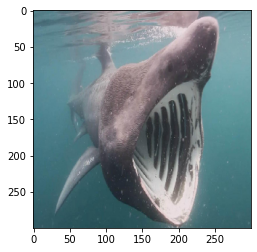

Shark


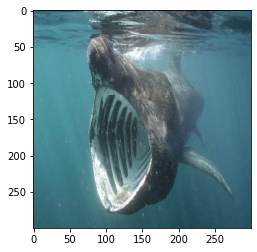

Shark


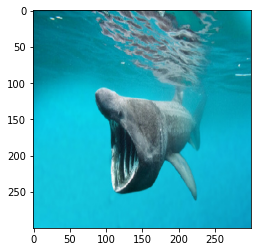

Shark


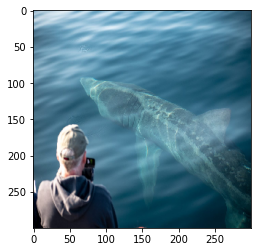

Shark


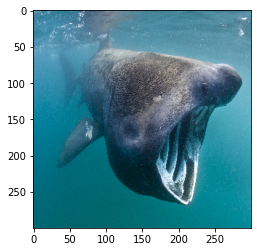

Shark


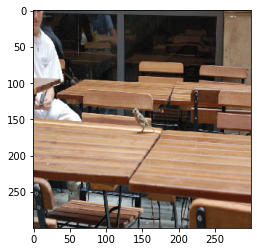

Not Shark


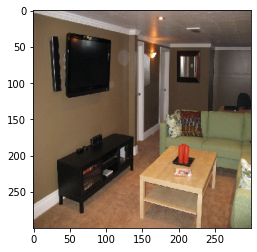

Not Shark


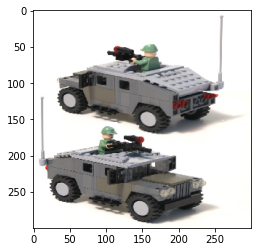

Not Shark


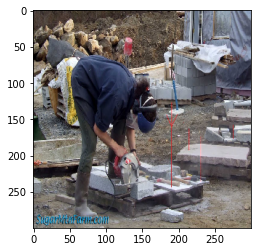

Not Shark


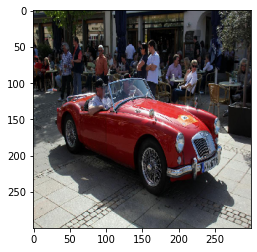

Not Shark


In [30]:
test_shark_dir = '/content/drive/MyDrive/Datasets/shark_notshark_dataset/test/shark'
test_notshark_dir = '/content/drive/MyDrive/Datasets/shark_notshark_dataset/test/not_shark'

for i in os.listdir(test_shark_dir)[:5]:
  img = image.load_img(test_shark_dir + '/' + i, target_size=(300,300))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])

  res = model.predict(images)
  if res == 0:
    print('Not Shark')
  else:
    print('Shark')

for i in os.listdir(test_notshark_dir)[:5]:
  img = image.load_img(test_notshark_dir + '/' + i, target_size=(300,300))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])

  res = model.predict(images)
  if res == 0:
    print('Not Shark')
  else:
    print('Shark')

Shark


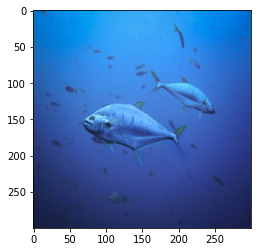

In [37]:
img = image.load_img('/content/sample.png', target_size=(300,300))
plt.imshow(img)
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
images = np.vstack([X])

res = model.predict(images)
if res == 0:
  print('Not Shark')
else:
  print('Shark')

## Saving as json

In [38]:
json_string = model.to_json()

In [39]:
from joblib import dump

In [40]:
dump(json_string, 'shark_classifier_json_str.joblib')

['shark_classifier_json_str.joblib']